# Introduction

In this lesson, we will present a "case study" of how to use IPython to study a physical system. We will use some Python constructs that were not introduced in the first two lessons, since the goal is to give a taste of what are the possibilities. Later lessons will cover the language details omitted here.

We consider a spring-mass system with mass $m$, spring constant $k$ and damping coefficient $c$ (we omit units, but these would of course be important in a real application). This system is governed by the second order differential equation:

$$
\newcommand{\mtab}{\quad\quad\quad\quad}
\mtab m\frac{d^2x}{dt^2}+c\frac{dx}{dt}+kx=0
$$

where $t$ represents time and $x=x(t)$ represents the position of the spring.

We don't use Python to solve the differential equation, since we know how to find the solution analytically. Later we will learn how to use SciPy to compute numerical solutions for differential equations, but this is not needed here. 

Writing a single solution valid for all possible values of $m$, $k$ and $c$ is problematic, since the system will behave differently depending on how strong the damping term is. To simplify things, we assume that the system is _underdamped_, which happens if 
$c^2-4mk<0$.

Then, the solution of the differential equation can be written as:

$$
\mtab x(t) = e^{-\beta t}\left(x_0\cos(\omega t) + \frac{v_0+\beta x_0}{\omega}\sin(\omega t)\right)
$$

where

$$
\mtab \beta = \frac{c}{2m}, \quad \omega = \frac{\sqrt{4mk-c^2}}{2m}
$$

and $x_0$ and $v_0$ are, respectively, the initial position and initial velocity of the mass (at $t=0$).

There is one last thing we need before we start. We need to import the library with mathematical and plotting functions. This is done evaluating the following cell:


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Defining the solution

As most problems in in the real world, the spring-mass system is defined in terms of _parameters_ ($m$, $k$ and $c$). The solution also depends on _initial conditions_ ($x_0$ and $v_0$).

SciPy, being a library for numerical computations, does not support _symbolic expressions_, that is, we cannot simply define an expression representing the solution in terms of generic variables $m$, $k$, $c$, $x_0$ and $v_0$. Unfortunately, the easiest thing to do is to use a somewhat advanced Python pattern called a _function factory_.

For now, just accept that the following code will produce "something" that represents a solution of the system:

(You must evaluate the following cell. It will produce no output.)

In [2]:
def make_solution(m, k, c, x0, v0):
    beta = c / (2*m)
    omega = sqrt(4*m*k - c**2) / (2*m)
    solution = lambda t, x0, v0: exp(-beta*t) * (x0 * cos(omega*t) + (v0 + beta*x0)/omega * sin(omega*t))
    return solution

# Using the solution

Now suppose we want to study the solution for the parameter values:

$$
\mtab m=2.0,\quad k=1.0,\quad c=0.25
$$

and initial conditions

$$
\mtab x_0 = 0.0, \quad v_0=1.0
$$

This is all we have to do to generate the solution:

(_Important note_: enter all arguments as floating point numbers.)

In [3]:
x = make_solution(2.0, 1.0, 0.25, 0.0, 1.0)

Again, there is no output when this cell is evaluated. But now we can use `x` to compute solution values. So, for example, to find the position of the mass at time $t = 2.5$ we evaluate:

In [4]:
x(2.5, 0.0, 1.0)

1.19252817202201

We can use a Python construct called _list comprehension_ to compute several values of the solution:

In [5]:
[ x(t, 0.0, 1.0) for t in [0, 0.5, 1, 1.5, 2, 2.5, 3] ] 

[0.0,
 0.47466125001525933,
 0.86364428708086782,
 1.1254944222780077,
 1.236513972432546,
 1.19252817202201,
 1.0082029646460724]

# Plotting

Let's now plot the solution. We will be using a module called `pyplot` from the library `matplotlib`. Fortunately, the libraries are used transparently (That's what the cell with `%pylab inline` at the beginnning of the worksheet does.)

To produce a plot, we need first to specify an array with the $t$ values at which we want the plot. It is not absolutely necessary, but we also put the corresponding $x$ values on an array:

In [8]:
tvalues = linspace(0, 20*pi, 100)
xvalues = x(tvalues, 0, 1)

After you evaluate this cell:

- `tvalues` contains 100 equally spaced points in the interval $[0,20\pi]$.
- `xvalues` contains the corresponding values of $x(t)$

To plot the solution we simply write:

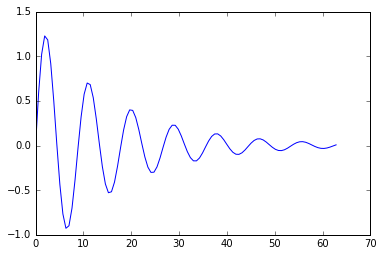

In [9]:
plot(tvalues, xvalues)

# Exercises